In [14]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from IPython.display import Image
load_dotenv()

True

In [5]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [20]:
graph=StateGraph(JokeState)
model=ChatGoogleGenerativeAI(model='gemini-2.5-pro',temperature=0.2)

In [21]:
def joke_generator(state:JokeState):
    prompt=f"Generate a joke on the given topic\n{state['topic']}"
    results=model.invoke(prompt)
    return {'joke':results.content}

In [22]:
def joke_explanation(state:JokeState):
    prompt=f"Explain the given joke\n{state['joke']}"
    results=model.invoke(prompt)
    return {'explanation':results.content}

In [23]:
graph.add_node("generate_joke",joke_generator)
graph.add_node("explanator_joke",joke_explanation)


graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","explanator_joke")
graph.add_edge("explanator_joke",END)

checkpointer=InMemorySaver()

workflow=graph.compile(checkpointer=checkpointer)

In [36]:
config={"configurable":{"thread_id":"3"}}
output_state=workflow.invoke({'topic':'maggie'},config=config)
output_state

{'topic': 'maggie',
 'joke': "Why is Maggie so bad at telling the truth?\n\nBecause it claims it'll be ready in 2 minutes, but we all know that's a hot, steaming lie.",
 'explanation': 'Of course! Here\'s a breakdown of the joke.\n\nThe humor comes from a clever play on words and a shared, common experience related to a specific product.\n\n### The Key Elements Explained:\n\n1.  **"Maggie" is not a person:** The joke sets you up to think of a person named Maggie. However, it\'s referring to **Maggi**, a very popular brand of instant noodles, especially in India and other parts of the world.\n\n2.  **The "2-Minute" Claim:** Maggi noodle packets famously advertise that they can be cooked and ready to eat in just "2 minutes."\n\n3.  **The "Hot, Steaming Lie":** This is the core of the punchline and works on two levels (it\'s a pun):\n    *   **The Lie:** Anyone who has actually made Maggi noodles knows it takes longer than two minutes. You have to boil the water, add the noodles and seaso

In [41]:
config={"configurable":{"thread_id":"3"}}
workflow.get_state(config)

StateSnapshot(values={'topic': 'maggie', 'joke': "Why is Maggie so bad at telling the truth?\n\nBecause it claims it'll be ready in 2 minutes, but we all know that's a hot, steaming lie.", 'explanation': 'Of course! Here\'s a breakdown of the joke.\n\nThe humor comes from a clever play on words and a shared, common experience related to a specific product.\n\n### The Key Elements Explained:\n\n1.  **"Maggie" is not a person:** The joke sets you up to think of a person named Maggie. However, it\'s referring to **Maggi**, a very popular brand of instant noodles, especially in India and other parts of the world.\n\n2.  **The "2-Minute" Claim:** Maggi noodle packets famously advertise that they can be cooked and ready to eat in just "2 minutes."\n\n3.  **The "Hot, Steaming Lie":** This is the core of the punchline and works on two levels (it\'s a pun):\n    *   **The Lie:** Anyone who has actually made Maggi noodles knows it takes longer than two minutes. You have to boil the water, add th

In [42]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'maggie', 'joke': "Why is Maggie so bad at telling the truth?\n\nBecause it claims it'll be ready in 2 minutes, but we all know that's a hot, steaming lie.", 'explanation': 'Of course! Here\'s a breakdown of the joke.\n\nThe humor comes from a clever play on words and a shared, common experience related to a specific product.\n\n### The Key Elements Explained:\n\n1.  **"Maggie" is not a person:** The joke sets you up to think of a person named Maggie. However, it\'s referring to **Maggi**, a very popular brand of instant noodles, especially in India and other parts of the world.\n\n2.  **The "2-Minute" Claim:** Maggi noodle packets famously advertise that they can be cooked and ready to eat in just "2 minutes."\n\n3.  **The "Hot, Steaming Lie":** This is the core of the punchline and works on two levels (it\'s a pun):\n    *   **The Lie:** Anyone who has actually made Maggi noodles knows it takes longer than two minutes. You have to boil the water, add t

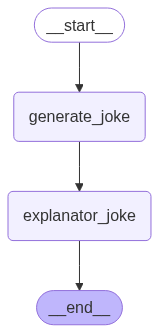

In [15]:
Image(workflow.get_graph().draw_mermaid_png())

In [43]:
# Time Travel
workflow.get_state({"configurable":{"thread_id":"3","checkpoint_id":"1f07a57f-35a0-6d82-8000-9bfaf15a972a"}})

StateSnapshot(values={'topic': 'maggie'}, next=('generate_joke',), config={'configurable': {'thread_id': '3', 'checkpoint_id': '1f07a57f-35a0-6d82-8000-9bfaf15a972a'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-16T04:17:41.199398+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f07a57f-35a0-6d81-bfff-b5baaabb1252'}}, tasks=(PregelTask(id='7267ceac-ed99-7306-4f74-420fb6d012b9', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Why is Maggie so bad at telling the truth?\n\nBecause it claims it'll be ready in 2 minutes, but we all know that's a hot, steaming lie."}),), interrupts=())

In [45]:
workflow.invoke(None,{"configurable":{"thread_id":"3","checkpoint_id":"1f07a57f-35a0-6d82-8000-9bfaf15a972a"}})

{'topic': 'maggie',
 'joke': 'Why did I break up with my packet of Maggie?\n\nBecause it had commitment issues. It promised me 2 minutes, but always ended up taking 10!',
 'explanation': 'Of course! Here\'s a breakdown of the joke:\n\nThe humor comes from a clever play on words and a relatable, everyday experience, using a technique called **personification**.\n\nHere\'s the step-by-step explanation:\n\n1.  **The Setup (Personification):** The joke begins by treating a packet of Maggie (a popular brand of instant noodles) as a romantic partner. The phrase "break up with" immediately puts the noodles in the role of a boyfriend or girlfriend.\n\n2.  **The "Promise" (The Literal Meaning):** Maggie noodles are famously marketed as "2-Minute Noodles." This is the "promise" or the "commitment" the product makes to the consumer on its packaging.\n\n3.  **The "Reality" (The Relatable Frustration):** Anyone who has actually made instant noodles knows it\'s nearly impossible to do it in just two

In [48]:
config={"configurable":{"thread_id":"3"}}
list(workflow.get_state_history(config=config))

[StateSnapshot(values={'topic': 'maggie', 'joke': 'Why did I break up with my packet of Maggie?\n\nBecause it had commitment issues. It promised me 2 minutes, but always ended up taking 10!', 'explanation': 'Of course! Here\'s a breakdown of the joke:\n\nThe humor comes from a clever play on words and a relatable, everyday experience, using a technique called **personification**.\n\nHere\'s the step-by-step explanation:\n\n1.  **The Setup (Personification):** The joke begins by treating a packet of Maggie (a popular brand of instant noodles) as a romantic partner. The phrase "break up with" immediately puts the noodles in the role of a boyfriend or girlfriend.\n\n2.  **The "Promise" (The Literal Meaning):** Maggie noodles are famously marketed as "2-Minute Noodles." This is the "promise" or the "commitment" the product makes to the consumer on its packaging.\n\n3.  **The "Reality" (The Relatable Frustration):** Anyone who has actually made instant noodles knows it\'s nearly impossible 

In [50]:
workflow.update_state({"configurable":{"thread_id":"3","checkpoint_id":"1f07a57f-35a0-6d82-8000-9bfaf15a972a",'checkpoint_ns':''}},{'topic':'samosa'})

{'configurable': {'thread_id': '3',
  'checkpoint_ns': '',
  'checkpoint_id': '1f07a5b4-1021-6fd7-8001-1a157437df6c'}}

In [51]:
list(workflow.get_state_history({"configurable":{"thread_id":"3"}}))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f07a5b4-1021-6fd7-8001-1a157437df6c'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-08-16T04:41:19.975624+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f07a57f-35a0-6d82-8000-9bfaf15a972a'}}, tasks=(PregelTask(id='eaea5ecf-5874-864e-d148-9e5e2d554ad7', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'maggie', 'joke': 'Why did I break up with my packet of Maggie?\n\nBecause it had commitment issues. It promised me 2 minutes, but always ended up taking 10!', 'explanation': 'Of course! Here\'s a breakdown of the joke:\n\nThe humor comes from a clever play on words and a relatable, everyday experience, using a technique called **personification*

In [53]:
workflow.invoke(None,{"configurable":{"thread_id":"3","checkpoint_id":"1f07a5b4-1021-6fd7-8001-1a157437df6c"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa get so emotional?\n\nBecause it was full of deep *fillings*',
 'explanation': 'Of course! This is a classic pun, which relies on a word having two different meanings.\n\nHere\'s the breakdown:\n\n1.  **The Literal Meaning:** A samosa is a pastry that is **filled** with a savory mixture, usually of spiced potatoes, peas, and onions. So, it is literally "full of fillings." The word "deep" can also be a nod to the fact that samosas are often **deep-fried**.\n\n2.  **The Pun/Figurative Meaning:** The word **"fillings"** sounds exactly like the word **"feelings"**.\n\nWhen you put it together, the joke works like this:\n\nThe question asks why the samosa was "emotional," making you think about human emotions. The answer, "Because it was full of deep *fillings*," sounds like it\'s saying the samosa was full of deep **feelings** (strong emotions), which would be a logical answer to the question. However, it\'s actually a literal description of 

In [56]:
config={"configurable":{"thread_id":"3"}}
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa get so emotional?\n\nBecause it was full of deep *fillings*', 'explanation': 'Of course! This is a classic pun, which relies on a word having two different meanings.\n\nHere\'s the breakdown:\n\n1.  **The Literal Meaning:** A samosa is a pastry that is **filled** with a savory mixture, usually of spiced potatoes, peas, and onions. So, it is literally "full of fillings." The word "deep" can also be a nod to the fact that samosas are often **deep-fried**.\n\n2.  **The Pun/Figurative Meaning:** The word **"fillings"** sounds exactly like the word **"feelings"**.\n\nWhen you put it together, the joke works like this:\n\nThe question asks why the samosa was "emotional," making you think about human emotions. The answer, "Because it was full of deep *fillings*," sounds like it\'s saying the samosa was full of deep **feelings** (strong emotions), which would be a logical answer to the question. However, it\'s actually a lit